In [133]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [134]:
apple = Table.read_table('AAPL (3).csv')

In [135]:
apple

Date,Open,High,Low,Close,Adj Close,Volume
2016-01-01,102.61,105.85,92.39,97.34,94.0513,1260138200
2016-02-01,96.47,98.89,92.59,96.69,93.4232,810397700
2016-03-01,97.65,110.42,97.42,108.99,105.879,745426900
2016-04-01,108.78,112.39,92.51,93.74,91.0644,871483100
2016-05-01,93.97,100.73,89.47,99.86,97.0097,900181300
2016-06-01,99.02,101.89,91.5,95.6,93.4367,779310200
2016-07-01,95.49,104.55,94.37,104.21,101.852,683474400
2016-08-01,104.41,110.23,104,106.1,103.699,625200700
2016-09-01,106.14,116.18,102.53,113.05,111.09,967434100
2016-10-01,112.71,118.69,112.28,113.54,111.572,686201700


In [149]:
def getDate (date): 
    return int(date[5:7])

In [150]:
justdates = Table().with_columns("Date", apple.apply(getDate, 0), "High", apple.column(2), "Low", apple.column(3))

In [151]:
justdates

Date,High,Low
1,105.85,92.39
2,98.89,92.59
3,110.42,97.42
4,112.39,92.51
5,100.73,89.47
6,101.89,91.5
7,104.55,94.37
8,110.23,104
9,116.18,102.53
10,118.69,112.28


In [152]:
justdates = justdates.with_columns("Median Line", np.median(justdates.column(2)), "Mean Line", np.mean(justdates.column(2)))

In [153]:
differential = np.append([0], np.diff(justdates.column(2)))

In [154]:
double_diff = np.append([0], np.diff(differential))

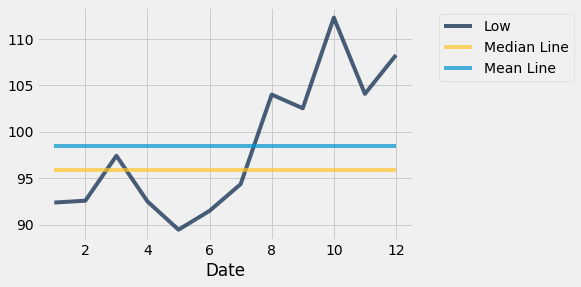

In [155]:
justdates.drop(1).plot(0)

In [156]:
diff_table = Table().with_column("date", justdates.column(0), "diff", differential)

In [157]:
diff_table

date,diff
1,0
2,0.199997
3,4.83
4,-4.91
5,-3.04
6,2.03
7,2.87
8,9.63
9,-1.47
10,9.75


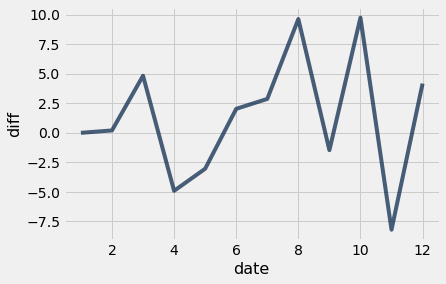

In [158]:
diff_table.plot(0)

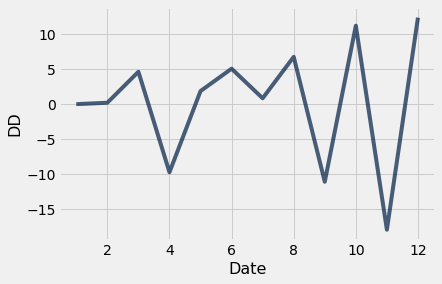

In [159]:
Table().with_columns("Date", justdates.column(0), "DD", double_diff).plot(0)

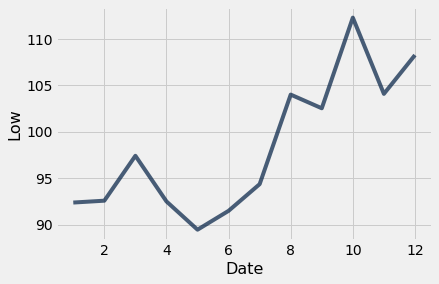

In [162]:
justdates.drop(1, 3, 4).plot(0)

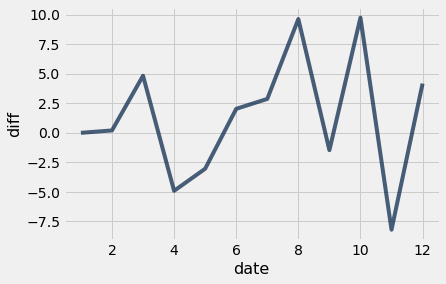

In [163]:
diff_table.plot(0)
